In [1]:
# import the modules
import pandas as pd
import numpy as np
from scipy import stats
import math
from statsmodels.stats.weightstats import ztest
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.metrics import r2_score


### Load the dataset

- Load the train data and using all your knowledge of pandas try to explore the different statistical properties of the dataset.

In [2]:
# read the dataset and extract the features and target separately
train = pd.read_csv('train.csv')

In [3]:
train

,Id,Name,Age,Nationality,Overall,Potential,Club,Value (M),Wage (M),Position
0,17221,F. Burdenski,25,Germany,54,58,Korona Kielce,0.070,0.001,CDM
1,11353,A. Deiola,21,Italy,64,73,Cagliari,0.700,0.010,CM
2,3402,T. Castagne,21,Belgium,72,79,Atalanta,3.700,0.013,RB
3,16071,D. Gorman,21,Northern Ireland,57,66,Stevenage,0.160,0.002,CM
4,12380,N. Molina Lucero,19,Argentina,63,75,Boca Juniors,0.550,0.002,LB
...,...,...,...,...,...,...,...,...,...,...
14379,7243,V. Podberezkin,25,Russia,68,69,FC Krasnodar,1.100,0.022,LM
14380,8527,S. Elbers,25,Netherlands,67,70,Excelsior,0.950,0.007,LM
14381,4714,G. Terziev,25,Bulgaria,71,76,NaN,0.000,0.000,RB
14382,10196,D. Petković,24,Montenegro,65,70,FC Lorient,0.525,0.002,GK


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14384 entries, 0 to 14383
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Id           14384 non-null  int64  
 1   Name         14384 non-null  object 
 2   Age          14384 non-null  int64  
 3   Nationality  14384 non-null  object 
 4   Overall      14384 non-null  int64  
 5   Potential    14384 non-null  int64  
 6   Club         14173 non-null  object 
 7   Value (M)    14384 non-null  float64
 8   Wage (M)     14384 non-null  float64
 9   Position     14384 non-null  object 
dtypes: float64(2), int64(4), object(4)
memory usage: 1.1+ MB


In [5]:
random_key = 6
X = train[['Age','Overall','Potential','Wage (M)']]
y = train['Value (M)']

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state=random_key)

In [6]:
X_train

,Age,Overall,Potential,Wage (M)
9385,22,72,81,0.007
11254,18,54,68,0.003
4606,31,74,74,0.024
2269,28,73,73,0.001
5841,29,77,77,0.125
...,...,...,...,...
8527,35,69,69,0.003
4714,32,68,68,0.021
10196,28,62,64,0.002
8419,19,59,79,0.003


### Visualize the data

- Check for the categorical & continuous features. 
- Check out the best plots for plotting between categorical target and continuous features and try making some inferences from these plots.
- Check for the correlation between the features

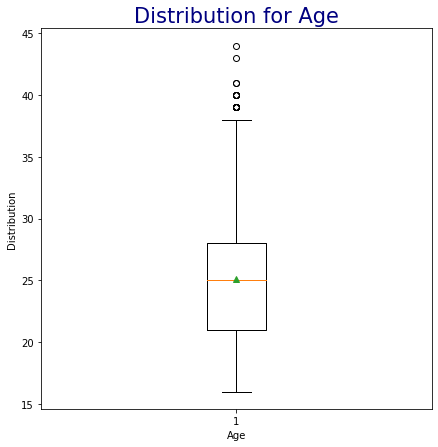

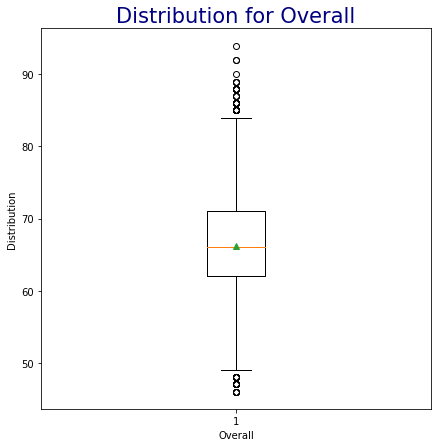

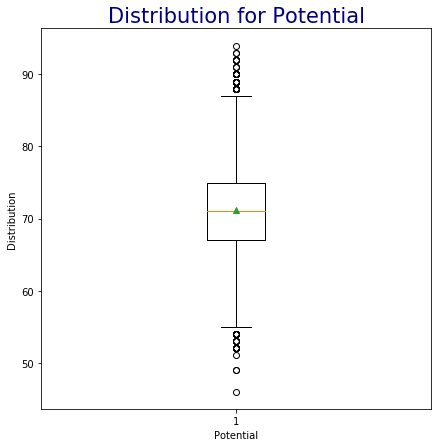

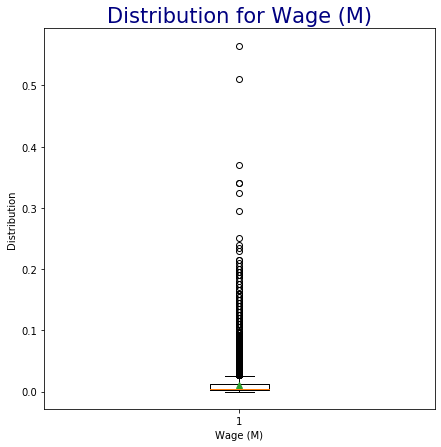

In [7]:
# Code Starts here

def show_boxplot(col_data, x_label, y_label, title, fig_size=(7, 7), show_outliers=True):
    """
    Shows boxplot with means
    
    Params:
    -------
    col_data: list or numpy array
    x_label: str
    y_label: str
    title: str
    fig_size: tupe of (int, int)
    show_outliers: bool
    """
    fig = plt.figure(figsize=fig_size)
    plt.boxplot(col_data, showmeans=True, showfliers=show_outliers)
    plt.title(title, fontsize=21, color='navy')
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.show()

for col in X_train.select_dtypes(include=np.number).columns:
    x_label = col
    y_label = 'Distribution'
    data = X_train[col]
    title = f'Distribution for {col}'
    show_boxplot(col_data=data, x_label=x_label, y_label=y_label, title=title)
# Code ends here

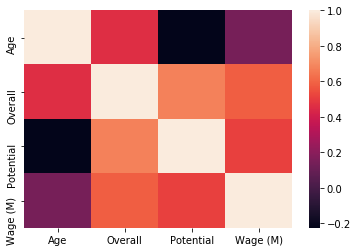

In [8]:
sns.heatmap(X_train.corr())

In [9]:
upper_threshold = 0.5
lower_threshold = -0.5


# List the correlation pairs
correlation = train.corr().unstack().sort_values(kind='quicksort')

# Select the highest correlation pairs having correlation greater than upper threshold and lower than lower threshold
corr_var_list = correlation[((correlation>upper_threshold) | (correlation<lower_threshold)) & (correlation!=1)]
print(corr_var_list)

Id         Overall     -0.975595
Overall    Id          -0.975595
Id         Potential   -0.653503
Potential  Id          -0.653503
Id         Value (M)   -0.548213
Value (M)  Id          -0.548213
Id         Wage (M)    -0.519570
Wage (M)   Id          -0.519570
Potential  Wage (M)     0.512910
Wage (M)   Potential    0.512910
Overall    Wage (M)     0.589736
Wage (M)   Overall      0.589736
Potential  Value (M)    0.595095
Value (M)  Potential    0.595095
Overall    Value (M)    0.635618
Value (M)  Overall      0.635618
Overall    Potential    0.678228
Potential  Overall      0.678228
Wage (M)   Value (M)    0.845124
Value (M)  Wage (M)     0.845124
dtype: float64


### Model building

- Separate the features and target and then split the train data into train and validation set.
- Now let's come to the actual task, using linear regression, predict the `Value (M)`. 
- Try improving upon the `r2_score` (R-Square) using different parameters that give the best score. You can use higher degree [Polynomial Features of sklearn](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html) to improve the model prediction. 



In [10]:
# Code Starts here
linreg = LinearRegression()
logreg = LogisticRegression()
#y = np.log(y_train)

linreg.fit(X_train,y_train)
y_pred = linreg.predict(X_test)
# display predictions
print('Mean Absolute Error :',(mean_absolute_error(y_test,y_pred)))
print('R-Square :',r2_score(y_test,y_pred))
# Code ends here

print('-'*20)

#Polynomial Feature
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(4)
X_train_2 = poly.fit_transform(X_train)
X_test_2 = poly.transform(X_test)

model = LinearRegression()
model.fit(X_train_2, y_train)

y_pred_2 = model.predict(X_test_2)

r2 = r2_score(y_test,y_pred_2)
print("R-Square :", r2)

mae = mean_absolute_error(y_test, y_pred_2)
print('Mean Absolute Error :', mae)

Mean Absolute Error : 1.36113034368551
R-Square : 0.7728182411379437
--------------------
R-Square : 0.9748469694258696
Mean Absolute Error : 0.3528900386871176


### Prediction on the test data and creating the sample submission file.

- Load the test data and store the `Id` column in a separate variable.
- Perform the same operations on the test data that you have performed on the train data.
- Create the submission file as a `csv` file consisting of the `Id` column from the test data and your prediction as the second column.

In [11]:
# Code Starts here
test = pd.read_csv('test.csv')
Id = test['Id']
test = test.drop(["Name","Nationality","Club","Position",'Id'],axis=1)

test_poly = poly.transform(test)
y_pred_1 = model.predict(test_poly)
y_pred_1 = y_pred_1.flatten()
id_1=pd.DataFrame({'Id':id,'Value (M)':y_pred_1})
id_1.to_csv("submission.csv", encoding='utf-8', index=False)
# Code ends here